<a href="https://colab.research.google.com/github/koh-hongQ/CME193/blob/main/Lecture_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CME 193 - Lecture 4

- Random numbers and histograms
- Power method walkthrough
- Linear algebra functions


## Random numbers

see [the documentation](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html)

* `rng.rand(d0,d1,...,dn)`, Random values in a given shape
* `rng.randn(d0, d1, ...,dn)`, Random standard normal
* `rng.randint(lo, hi, size)`, Random integers `[lo, hi)`
* `rng.choice(a, size, repl, p)`, Sample from a
* `rng.shuffle(a)`, Permutation (in-place)
* `rng.permutation(a)`, Permutation (new array)
* Also, have parameterized distributions: `beta`, `binomial`, `chisquare`, `exponential`, `dirichlet`, `gamma`, `laplace`, `lognormal`, `pareto`, `poisson`, `power`...

In [20]:
import numpy.random as rng

In [3]:
rng.randint(-10,10)

-5

In [4]:
rng.choice?

### Histograms

In [19]:
import matplotlib.pyplot as plt


In [8]:
x1 = rng.normal(2,3,1000)
x2 = rng.normal(1,5,1000)

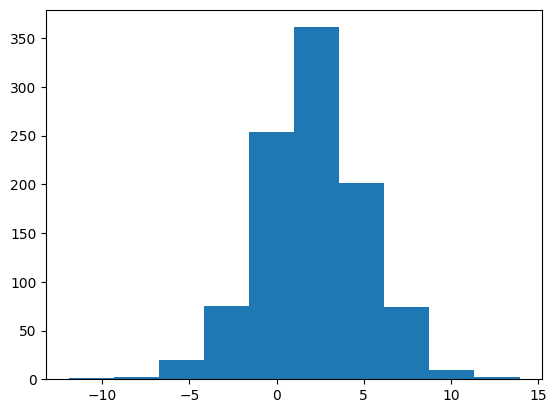

In [14]:
plt.hist(x1);

(array([ 12.,  26.,  82., 142., 233., 242., 157.,  70.,  29.,   7.]),
 array([-13.93785083, -10.93298289,  -7.92811495,  -4.92324701,
         -1.91837907,   1.08648886,   4.0913568 ,   7.09622474,
         10.10109268,  13.10596062,  16.11082856]),
 [<matplotlib.patches.Polygon at 0x7a69e83294c0>])

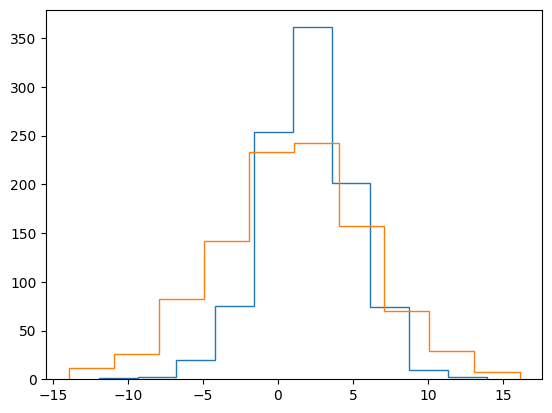

In [15]:
plt.hist(x1,histtype='step')
plt.hist(x2,histtype='step')

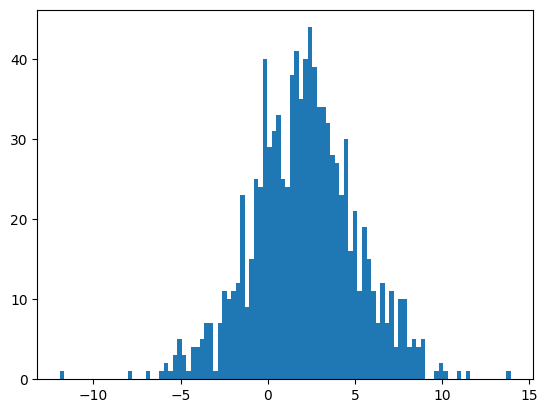

In [16]:
plt.hist(x1,bins=100);

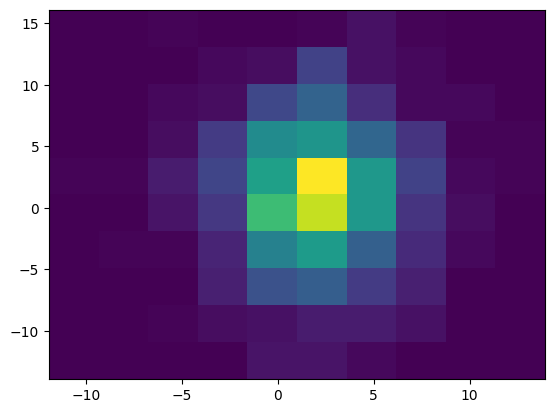

In [17]:
plt.hist2d(x1,x2);

## Power method

Power method is an algorithm for finding the largest eigenpair of a matrix.  We'll assume that we're working with symmetric/hermitian matrices for simplicity.  Recall the largest eigenvector of a matrix $A$ solves the variational problem:
$$\max_{\|v\|_2 = 1} v^T A v$$
The eigenvalue is the value $\lambda = v^T A v$.
* generate a random symmetric matrix (however you like).
* Find the largest eigenpair using the power method
* Compare the answer with what you would get from numpy.linalg.eigh

The power method uses iterated matrix-vector multiplication to find the largest magnitude eigenvalue of $A$.  
```
    input) A: an n x n symmetric matrix
    outputs) l: the eigenvalue with the largest absolute value
             v: the corresponding eigenvector

    v <- random vector of length n
    while l has not converged:
        v <- A v
        v <- v / ||v||_2
        l <- v^T A v
```

turn the above pseudo-code into a python function that implements power method. How does the result compare to `eigh`?

# Linear Algebra in NumPy

We'll start with
```python
import numpy.linalg as la
```
`numpy` is the *package*.  `linalg` is a *module* in the package.

In [11]:
import numpy.linalg as la

You can find a full list of available operations/decompositions in [the documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.linalg.html)

* `la.eye(3)`, Identity matrix
* `la.trace(A)`, Trace
* `la.column_stack((A,B))`, Stack column wise
* `la.row_stack((A,B,A))`, Stack row wise
* `la.qr`, Computes the QR decomposition
* `la.cholesky`, Computes the Cholesky decomposition
* `la.inv(A)`, Inverse
* `la.solve(A,b)`, Solves $Ax = b$ for $A$ full rank
* `la.lstsq(A,b)`, Solves $\arg\min_x \|Ax-b\|_2$
* `la.eig(A)`, Eigenvalue decomposition
* `la.eigh(A)`, Eigenvalue decomposition for
symmetric or hermitian
* `la.eigvals(A)`, Computes eigenvalues.
* `la.svd(A, full)`, Singular value decomposition
* `la.pinv(A)`, Computes pseudo-inverse of A

In [22]:
import numpy as np

# example of SVD
A = np.random.normal(0, 1, (2,3))
U, S, V = la.svd(A)
print("A  = \n", A)
print("U = \n", U)
print("S = \n", S)
print("V = \n", V)

A  = 
 [[ 0.247353   -0.26911469  1.07555992]
 [ 1.01760502  0.22529596 -0.3395316 ]]
U = 
 [[-0.78971545  0.61347331]
 [ 0.61347331  0.78971545]]
S = 
 [1.19402197 1.03262135]
V = 
 [[ 0.35923546  0.29374425 -0.88581273]
 [ 0.92518218  0.01241987  0.37932003]
 [-0.12242476  0.95580336  0.26730529]]


In [24]:
A = np.arange(0, 4, 1.0).reshape(2,2)
x = np.array([1.0,2.0])
b = A@x
# x2 <- A \ b
x2 = la.solve(A,b)
# la.solve(A,b) 는 선형방정식 𝐴𝑥=𝑏 의 해를 구함.


print("A = \n",A)
print("x = \n", x)
print("b = \n", b)
print("x2 = \n", x2)

A = 
 [[0. 1.]
 [2. 3.]]
x = 
 [1. 2.]
b = 
 [2. 8.]
x2 = 
 [1. 2.]
